### Load raw data

In [1]:
import pandas as pd
files = [
    '1-CPIAUCSL',
    '2-UNRATE',
    '3-MORTGAGE30US',
    '4-Metro_market_temp_index_uc_sfrcondo_month',
    '5-Metro_invt_fs_uc_sfrcondo_month',
    '6-Metro_mlp_uc_sfrcondo_month',
    '7-Metro_median_sale_to_list_uc_sfrcondo_month',
    '8-Metro_median_days_to_close_uc_sfrcondo_month',
    'Y-Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month'
]


In [2]:
# pip install yfinance--upgrade --no-cache-dir
import yfinance as yf

sp500 = yf.Ticker("^GSPC")
hist = sp500.history(start="2018-01-01", end="2025-06-19", interval="1mo")

sp500_close = hist["Close"].reset_index()
sp500_close.rename(columns={'Date': 'date'}, inplace=True)
sp500_close['date'] = sp500_close['date'].dt.year.astype(str) + '-' + sp500_close['date'].dt.month.astype(str)
# sp500_close.head()

In [3]:
start_year = 2018
start_month = 1
cpi = pd.read_csv("1-CPIAUCSL.csv")
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
print("min date of cpi:", cpi['observation_date'].min())
cpi = cpi[(cpi['observation_date'].dt.year >= start_year) & (cpi['observation_date'].dt.month >= start_month)]
cpi.rename(columns={'observation_date': 'date'}, inplace=True)
cpi['date'] = cpi['date'].dt.year.astype(str) + '-' + cpi['date'].dt.month.astype(str)

unrate = pd.read_csv("2-UNRATE.csv")
unrate['observation_date'] = pd.to_datetime(unrate['observation_date'])
print("min date of unrate:", unrate['observation_date'].min())
unrate = unrate[(unrate['observation_date'].dt.year >= start_year) & (unrate['observation_date'].dt.month >= start_month)]
unrate.rename(columns={'observation_date': 'date'}, inplace=True)
unrate['date'] = unrate['date'].dt.year.astype(str) + '-' + unrate['date'].dt.month.astype(str)

mortgage = pd.read_csv("3-MORTGAGE30US.csv")
mortgage['observation_date'] = pd.to_datetime(mortgage['observation_date'])
print("min date of mortgage:", mortgage['observation_date'].min())
mortgage = mortgage[(mortgage['observation_date'].dt.year >= start_year) & (mortgage['observation_date'].dt.month >= start_month)]
# pick each start month
mortgage['date'] = mortgage['observation_date'].dt.year.astype(str) + mortgage['observation_date'].dt.month.astype(str)
mortgage = mortgage.sort_values(by=['date', 'observation_date'], ascending=True).groupby('date').first().sort_values(by="observation_date")
mortgage.rename(columns={'observation_date': 'date'}, inplace=True)
mortgage.reset_index(drop=True, inplace=True)
mortgage['date'] = mortgage['date'].dt.year.astype(str) + '-' + mortgage['date'].dt.month.astype(str)

zillow_mhi = pd.read_csv("4-Metro_market_temp_index_uc_sfrcondo_month.csv")
zillow_mhi = zillow_mhi.iloc[0,5:].T.rename("zillow_mhi").astype(float)
zillow_mhi = zillow_mhi.reset_index().rename(columns={'index': 'date'})
zillow_mhi['date'] = pd.to_datetime(zillow_mhi['date'])
print("min date of zillow_mhi:", zillow_mhi['date'].min())
zillow_mhi = zillow_mhi[(zillow_mhi['date'].dt.year >= start_year) & (zillow_mhi['date'].dt.month >= start_month)]
zillow_mhi['date'] = zillow_mhi['date'].dt.year.astype(str) + '-' + zillow_mhi['date'].dt.month.astype(str)

zillow_fsi = pd.read_csv("5-Metro_invt_fs_uc_sfrcondo_month.csv")
zillow_fsi = zillow_fsi.iloc[0,5:].T.rename("Zillow_fsi").astype(float)
zillow_fsi = zillow_fsi.reset_index().rename(columns={'index': 'date'})
zillow_fsi['date'] = pd.to_datetime(zillow_fsi['date'])
print("min date of zillow_fsi:", zillow_fsi['date'].min())
zillow_fsi = zillow_fsi[(zillow_fsi['date'].dt.year >= start_year) & (zillow_fsi['date'].dt.month >= start_month)]
zillow_fsi['date'] = zillow_fsi['date'].dt.year.astype(str) + '-' + zillow_fsi['date'].dt.month.astype(str)

zillow_mlp = pd.read_csv("6-Metro_mlp_uc_sfrcondo_month.csv")
zillow_mlp = zillow_mlp.iloc[0,5:].T.rename("Zillow_mlp").astype(float)
zillow_mlp = zillow_mlp.reset_index().rename(columns={'index': 'date'})
zillow_mlp['date'] = pd.to_datetime(zillow_mlp['date'])
print("min date of zillow_mlp:", zillow_mlp['date'].min())
zillow_mlp = zillow_mlp[(zillow_mlp['date'].dt.year >= start_year) & (zillow_mlp['date'].dt.month >= start_month)]
zillow_mlp['date'] = zillow_mlp['date'].dt.year.astype(str) + '-' + zillow_mlp['date'].dt.month.astype(str)

zillow_slr = pd.read_csv("7-Metro_median_sale_to_list_uc_sfrcondo_month.csv")
zillow_slr = zillow_slr.iloc[0,5:].T.rename("Zillow_slr").astype(float)
zillow_slr = zillow_slr.reset_index().rename(columns={'index': 'date'})
zillow_slr['date'] = pd.to_datetime(zillow_slr['date'])
print("min date of zillow_slr:", zillow_slr['date'].min())
zillow_slr = zillow_slr[(zillow_slr['date'].dt.year >= start_year) & (zillow_slr['date'].dt.month >= start_month)]
zillow_slr['date'] = zillow_slr['date'].dt.year.astype(str) + '-' + zillow_slr['date'].dt.month.astype(str)

zillow_dc = pd.read_csv("8-Metro_median_days_to_close_uc_sfrcondo_month.csv")
zillow_dc = zillow_dc.iloc[0,5:].T.rename("Zillow_dc").astype(float)
zillow_dc = zillow_dc.reset_index().rename(columns={'index': 'date'})
zillow_dc['date'] = pd.to_datetime(zillow_dc['date'])
print("min date of zillow_dc:", zillow_dc['date'].min())
zillow_dc = zillow_dc[(zillow_dc['date'].dt.year >= start_year) & (zillow_dc['date'].dt.month >= start_month)]
zillow_dc['date'] = zillow_dc['date'].dt.year.astype(str) + '-' + zillow_dc['date'].dt.month.astype(str)

zillow_zhvi = pd.read_csv("Y-Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv")
zillow_zhvi = zillow_zhvi.iloc[0,5:].T.rename("Zillow_zhvi").astype(float)
zillow_zhvi = zillow_zhvi.reset_index().rename(columns={'index': 'date'})
zillow_zhvi['date'] = pd.to_datetime(zillow_zhvi['date'])
print("min date of zillow_zhvi:", zillow_zhvi['date'].min())
zillow_zhvi = zillow_zhvi[(zillow_zhvi['date'].dt.year >= start_year) & (zillow_zhvi['date'].dt.month >= start_month)]
zillow_zhvi['date'] = zillow_zhvi['date'].dt.year.astype(str) + '-' + zillow_zhvi['date'].dt.month.astype(str)

# # convert index to datetime, and add 1 day to make sure it is not the end of each month
# # then extract the year and month into a new column for merge different data 
# zillow_zhvi["date"] = pd.to_datetime(zillow_zhvi['index']) + pd.Timedelta(days=1)
# zillow_zhvi["year"] = zillow_zhvi["date"].dt.year
# zillow_zhvi["month"] = zillow_zhvi["date"].dt.month

min date of cpi: 1947-01-01 00:00:00
min date of unrate: 1948-01-01 00:00:00
min date of mortgage: 1971-04-02 00:00:00
min date of zillow_mhi: 2018-01-31 00:00:00
min date of zillow_fsi: 2018-01-31 00:00:00
min date of zillow_mlp: 2018-01-31 00:00:00
min date of zillow_slr: 2018-01-31 00:00:00
min date of zillow_dc: 2018-01-31 00:00:00
min date of zillow_zhvi: 1996-02-29 00:00:00


### Data Merge

In [4]:
data_sources = [cpi, unrate, mortgage, zillow_mhi, zillow_fsi, zillow_mlp, zillow_slr, zillow_dc, sp500_close]
X = pd.DataFrame(columns=['date'])
for x in data_sources:
    X = X.merge(x, on='date', how='right')
X = X.dropna()
X.describe()

y = zillow_zhvi

df_raw = X.merge(y, on='date', how='right')

In [5]:
# Define a column mapping dictionary using underscores and no spaces
col_map = {
    'date': 'date',
    'CPIAUCSL': 'cpi',
    'UNRATE': 'unemployment_rate',
    'MORTGAGE30US': 'mortgage_30y_rate',
    'zillow_mhi': 'median_market_heat_index',
    'Zillow_fsi': 'for_sale_inventory',
    'Zillow_mlp': 'median_listing_price',
    'Zillow_slr': 'sale_to_list_ratio',
    'Zillow_dc': 'days_to_close',
    'Close': 'sp500_close',
    'Zillow_zhvi': 'home_value_index'
}
df_raw = df_raw.rename(columns=col_map)

### Preprocessing

In [6]:
df = df_raw.copy()
# home_value_index shift 1 row to above
df['home_value_index_t_plus_1'] = df['home_value_index'].shift(-1)
df['y_zhvi_t_plus_1'] = df['home_value_index_t_plus_1']
df = df.drop(columns=['home_value_index_t_plus_1', 'home_value_index'])
df.set_index('date', inplace=True)
df.dropna(inplace=True)
df.head()

,cpi,unemployment_rate,mortgage_30y_rate,median_market_heat_index,for_sale_inventory,median_listing_price,sale_to_list_ratio,days_to_close,sp500_close,y_zhvi_t_plus_1
date,,,,,,,,,,
2018-1,248.859,4.0,3.95,50.0,1360757.0,255000.0,0.981818,35.0,2823.810059,225975.194975
2018-2,249.529,4.1,4.22,50.0,1388126.0,264900.0,0.983699,31.0,2713.830078,228263.228285
2018-3,249.577,4.0,4.43,52.0,1515704.0,269900.0,0.987484,31.0,2640.870117,230427.492236
2018-4,250.227,4.0,4.40,54.0,1596751.0,279000.0,0.990099,32.0,2648.050049,233132.488677
2018-5,250.792,3.8,4.55,55.0,1664787.0,281000.0,0.992308,33.0,2705.270020,235481.038011


### EDA

In [7]:
feature_columns = [ 'unemployment_rate', 'mortgage_30y_rate',
       'median_market_heat_index', 'for_sale_inventory', 
        'sp500_close'] 
delete_columns = ['cpi', 'median_listing_price', 'sale_to_list_ratio', 'days_to_close']
label_column = ["y_zhvi_t_plus_1"]
all_columns = feature_columns + delete_columns + label_column

#### Descriptive Statistics

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

def describe_with_details(df, confidence=0.95):
    rows = []
    for col in df.columns:
        data = df[col].dropna()
        n = data.count()
        mean = data.mean()
        std = data.std(ddof=1)
        se = std / np.sqrt(n) if n > 0 else np.nan
        median = data.median()
        mode = data.mode()
        mode_val = mode.iloc[0] if not mode.empty else np.nan
        variance = data.var(ddof=1)
        kurtosis = data.kurtosis()
        skewness = data.skew()
        data_range = data.max() - data.min() if n > 0 else np.nan
        data_min = data.min()
        data_max = data.max()
        total = data.sum()
        count = n
        
        # Confidence interval calculation (normal approx)
        z = stats.norm.ppf(1 - (1 - confidence) / 2)
        conf_level = se * z if n > 0 else np.nan
        
        rows.append({
            'Details': col,
            'Mean': mean,
            'Standard Error': se,
            'Median': median,
            'Mode': mode_val,
            'Standard Deviation': std,
            'Sample Variance': variance,
            'Kurtosis': kurtosis,
            'Skewness': skewness,
            'Range': data_range,
            'Minimum': data_min,
            'Maximum': data_max,
            'Sum': total,
            'Count': count,
            f'Confidence Level({confidence*100:.1f}%)': conf_level
        })

    return pd.DataFrame(rows).set_index('Details').round(2).T


stats_df = describe_with_details(df)
styled_stats_df = (
    stats_df.style
    .set_table_styles([
        {'selector': 'table', 
         'props': [('border-collapse', 'collapse'), ('border', '1px solid black')]},
        {'selector': 'th', 
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('text-align', 'center'),
                   ('border', '1px solid black'),
                   ('font-weight', 'bold')]},
        {'selector': 'td', 
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('text-align', 'center'),
                   ('border', '1px solid black')]}
    ])
    .set_properties(**{'text-align': 'center', 'color': 'black'})
    .format(precision=2)
)
styled_stats_df


Details,cpi,unemployment_rate,mortgage_30y_rate,median_market_heat_index,for_sale_inventory,median_listing_price,sale_to_list_ratio,days_to_close,sp500_close,y_zhvi_t_plus_1
Mean,280.11,4.60,4.84,62.14,1175717.41,340106.14,0.99,32.49,3949.63,305105.38
Standard Error,2.65,0.21,0.17,1.15,30990.98,5121.23,0.00,0.23,106.26,5439.11
Median,273.35,3.90,4.53,59.00,1108665.50,339450.00,0.99,32.00,3971.52,314417.75
Mode,255.80,3.60,2.88,54.00,687048.00,395000.00,1.00,31.00,2506.85,225975.19
Standard Deviation,24.83,2.01,1.58,10.77,290721.18,48041.44,0.01,2.12,996.82,51023.40
Sample Variance,616.34,4.03,2.51,116.10,84518804081.92,2307979503.15,0.00,4.51,993656.79,2603386838.68
Kurtosis,-1.59,11.62,-1.48,-0.45,-0.85,-1.58,-0.52,-0.86,-0.82,-1.69
Skewness,0.24,3.25,0.23,0.74,0.50,-0.04,0.21,0.35,0.41,-0.17
Range,71.46,11.40,5.11,41.00,1055291.00,155000.00,0.03,8.00,3533.68,142217.12
Minimum,248.86,3.40,2.65,47.00,687048.00,255000.00,0.98,29.00,2506.85,225975.19


In [9]:

stats_df = describe_with_details(df[feature_columns + label_column])
styled_stats_df = (
    stats_df.style
    .set_table_styles([
        {'selector': 'table', 
         'props': [('border-collapse', 'collapse'), ('border', '1px solid black')]},
        {'selector': 'th', 
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('text-align', 'center'),
                   ('border', '1px solid black'),
                   ('font-weight', 'bold')]},
        {'selector': 'td', 
         'props': [('background-color', 'white'),
                   ('color', 'black'),
                   ('text-align', 'center'),
                   ('border', '1px solid black')]}
    ])
    .set_properties(**{'text-align': 'center', 'color': 'black'})
    .format(precision=2)
)
styled_stats_df


Details,unemployment_rate,mortgage_30y_rate,median_market_heat_index,for_sale_inventory,sp500_close,y_zhvi_t_plus_1
Mean,4.60,4.84,62.14,1175717.41,3949.63,305105.38
Standard Error,0.21,0.17,1.15,30990.98,106.26,5439.11
Median,3.90,4.53,59.00,1108665.50,3971.52,314417.75
Mode,3.60,2.88,54.00,687048.00,2506.85,225975.19
Standard Deviation,2.01,1.58,10.77,290721.18,996.82,51023.40
Sample Variance,4.03,2.51,116.10,84518804081.92,993656.79,2603386838.68
Kurtosis,11.62,-1.48,-0.45,-0.85,-0.82,-1.69
Skewness,3.25,0.23,0.74,0.50,0.41,-0.17
Range,11.40,5.11,41.00,1055291.00,3533.68,142217.12
Minimum,3.40,2.65,47.00,687048.00,2506.85,225975.19


#### Distribution

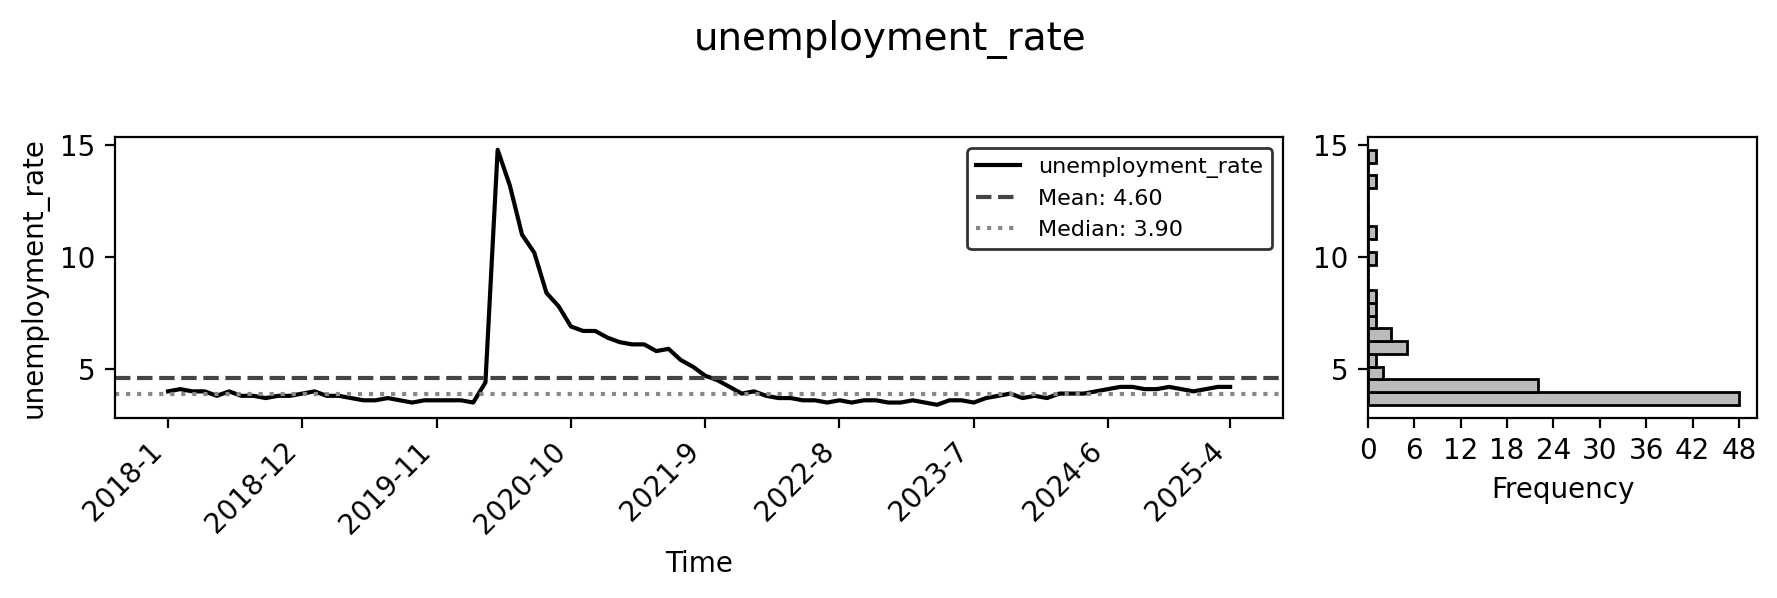

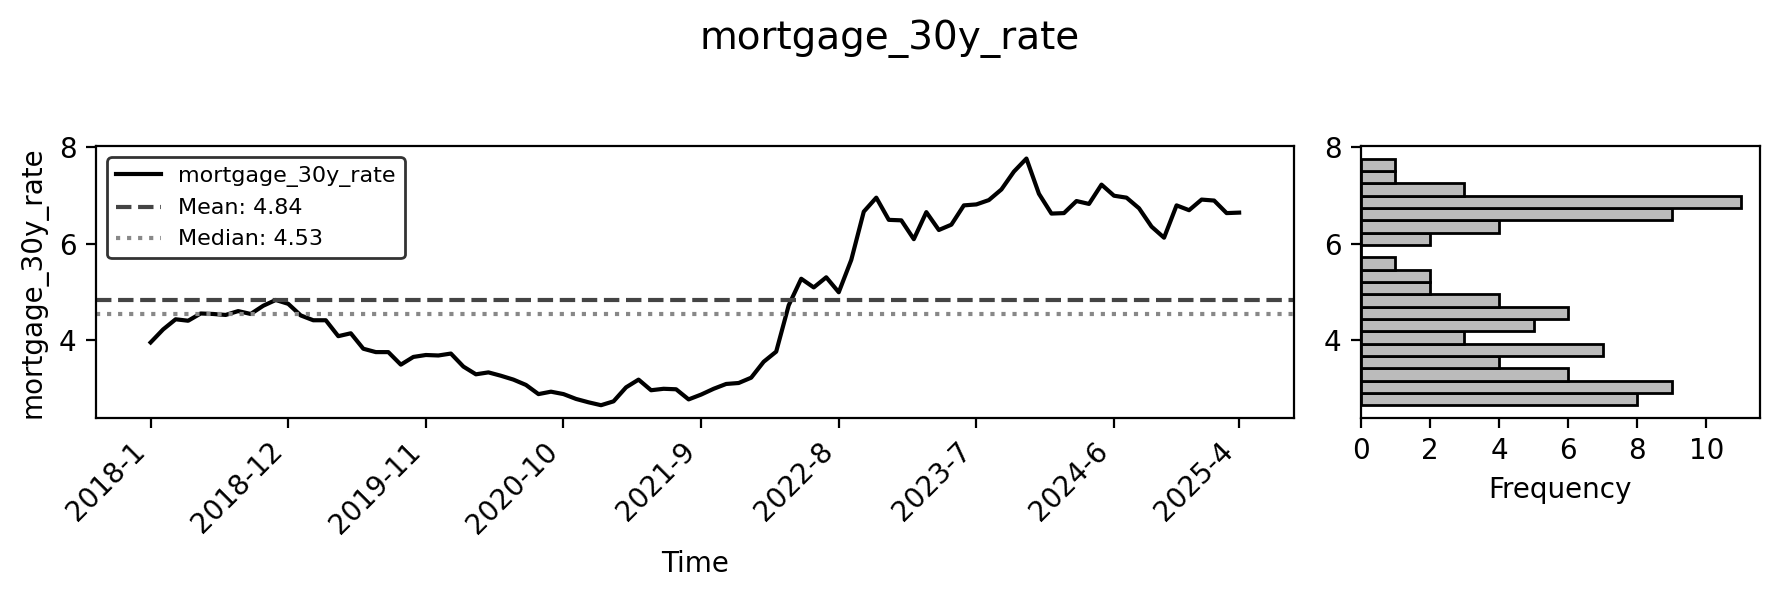

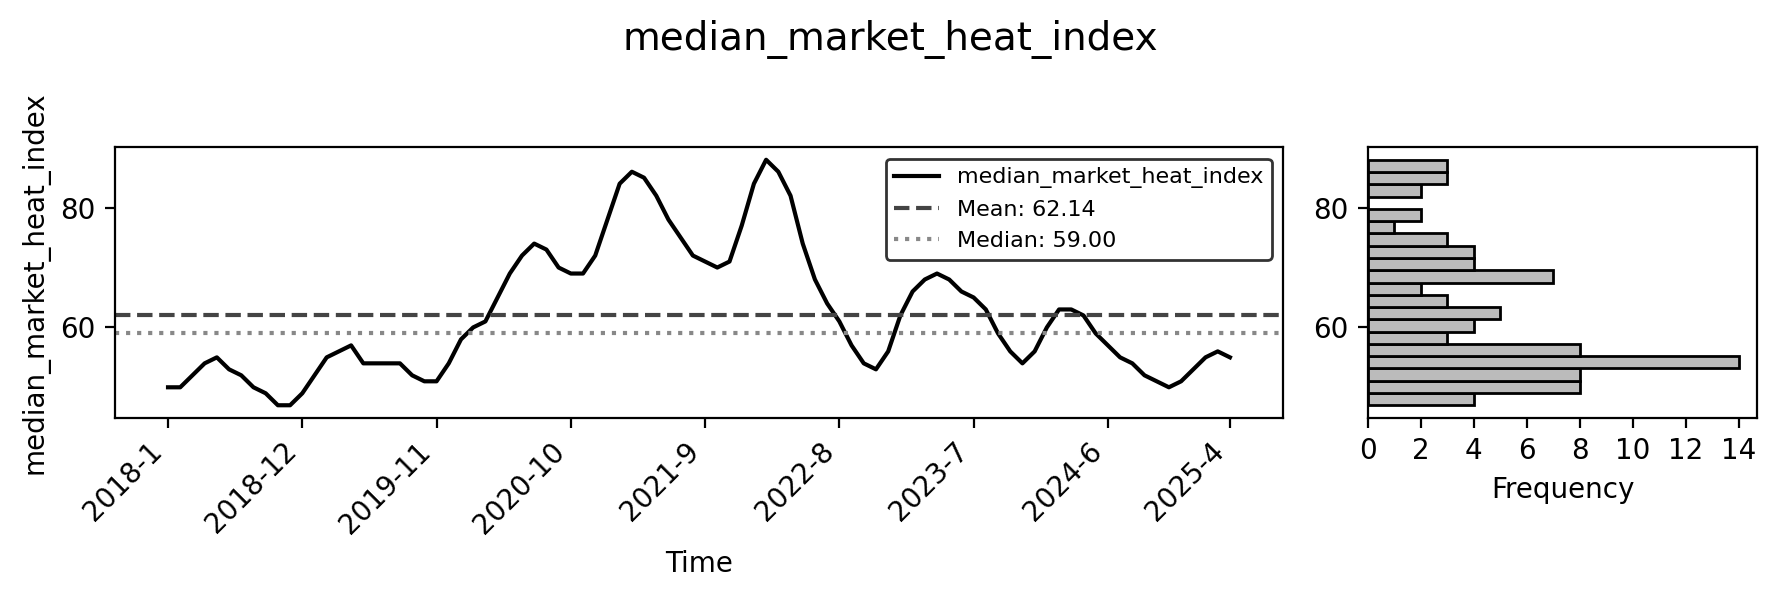

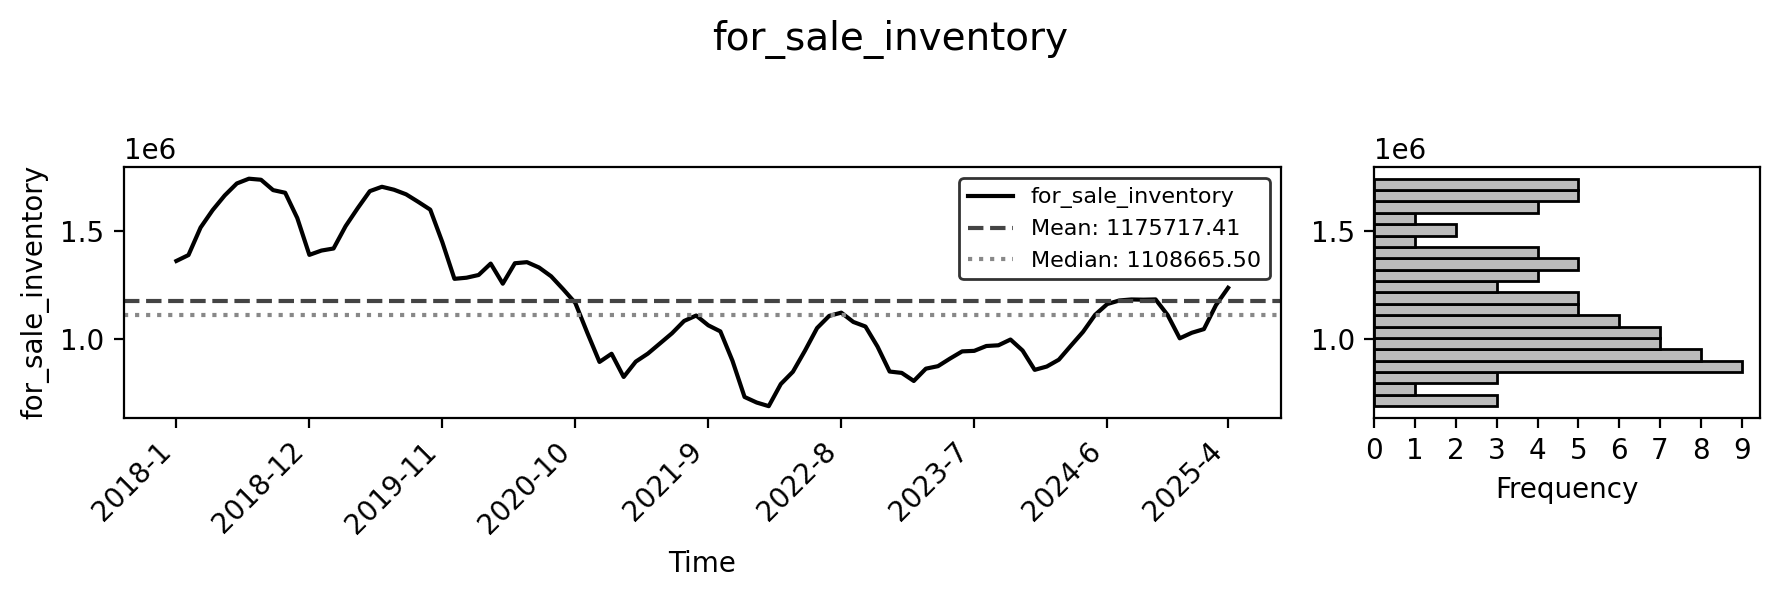

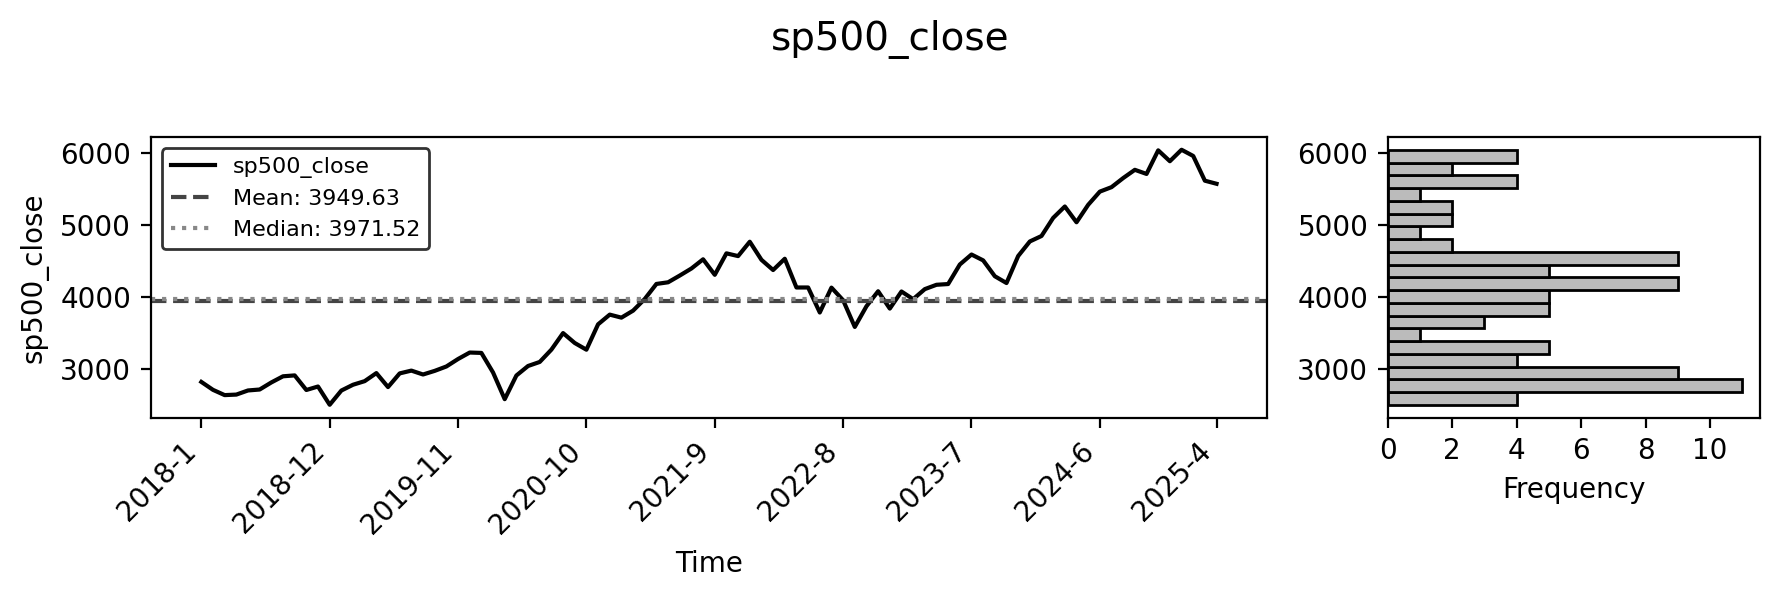

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create 'figure' directory if not exists
output_dir = 'figure'
os.makedirs(output_dir, exist_ok=True)

main_color = '#000000'       # Black for main lines and text
mean_line_color = '#444444'  # Dark gray for mean line
median_line_color = '#888888' # Lighter gray for median
bar_fill_color = '#BBBBBB'   # Light gray for histogram bars
bar_edge_color = '#000000'   # Black border for histogram bars

for col in all_columns:
    fig, (ax1, ax2) = plt.subplots(
        1, 2,
        figsize=(9, 3),
        dpi=200,
        gridspec_kw={'width_ratios': [3, 1]}
    )

    # --- Left plot: time series ---
    ax1.plot(df.index, df[col], color=main_color, label=col)

    data = df[col].dropna()
    mean_val = data.mean()
    median_val = data.median()

    # Add mean and median lines
    ax1.axhline(mean_val, color=mean_line_color, linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    ax1.axhline(median_val, color=median_line_color, linestyle=':', linewidth=1.5, label=f'Median: {median_val:.2f}')

    ax1.set_ylabel(col, color=main_color)
    ax1.tick_params(axis='y', colors=main_color)

    # Ensure start and end time on x-axis
    total_points = len(df.index)
    step = max(1, total_points // 8)
    xticks = list(df.index[::step])
    if df.index[0] not in xticks:
        xticks = [df.index[0]] + xticks
    if df.index[-1] not in xticks:
        xticks = xticks + [df.index[-1]]
    ax1.set_xticks(xticks)
    ax1.set_xlabel('Time', color=main_color)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', color=main_color)
    ax1.legend(facecolor='white', edgecolor='black', fontsize=8)

    # --- Right plot: frequency histogram ---
    counts, bin_edges = np.histogram(data, bins=20)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    ax2.barh(bin_centers, counts, height=bin_edges[1] - bin_edges[0],
             color=bar_fill_color, edgecolor=bar_edge_color)
    ax2.set_ylabel('')  # Remove y-axis title
    ax2.set_xlabel('Frequency', color=main_color)
    ax2.tick_params(axis='y', colors=main_color)
    ax2.tick_params(axis='x', colors=main_color)
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Common title
    fig.suptitle(col, fontsize=14, color=main_color)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save figure to 'figure' folder as PNG with high resolution
    filename = f"{col.replace(' ', '_')}.png"
    if col in feature_columns:
        fig.savefig(os.path.join(output_dir + "/picked/", filename), dpi=300, bbox_inches='tight')
        plt.show()
    fig.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close figure to free memory


In [11]:
df.to_excel('10-MG620_input_data.xlsx')

#### Correlation Analysis

In [12]:
def highlight_strong_corr(val):
    if pd.isna(val):
        return 'background-color: white; color: black;'
    color = 'white' if abs(val) >= 0.9 else 'black'
    bg = '#555555' if abs(val) >= 0.9 else ''
    return f'background-color: {bg}; color: {color};'

def styled_corr_matrix(table):
    corr_matrix = table.corr()
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    corr_matrix_masked = corr_matrix.mask(mask)

    styled_corr = (
        corr_matrix_masked.style
        .format(na_rep='') 
        .background_gradient(cmap='Greys', vmin=-2, vmax=3)
        .applymap(highlight_strong_corr)
        .set_table_styles([
            {'selector': 'th.row_heading, th.row_heading.level0',
             'props': [
                 ('background-color', 'white'),
                 ('color', 'black'),
                 ('text-align', 'center'),
                 ('font-weight', 'bold'),
                 ('border', '1px solid black')
             ]},
            {'selector': 'th.col_heading',
             'props': [
                 ('background-color', 'white'),
                 ('color', 'black'),
                 ('text-align', 'center'),
                 ('font-weight', 'bold'),
                 ('border', '1px solid black')
             ]},
            {'selector': 'td',
             'props': [
                 ('border', '1px solid black')
             ]},
            {'selector': 'table',
             'props': [
                 ('border-collapse', 'collapse'),
                 ('border', '1px solid black')
             ]}
        ])
    )
    return styled_corr

table = df[feature_columns + label_column + delete_columns]
styled_corr_matrix(table)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11680\1545943980.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_strong_corr)


,unemployment_rate,mortgage_30y_rate,median_market_heat_index,for_sale_inventory,sp500_close,y_zhvi_t_plus_1,cpi,median_listing_price,sale_to_list_ratio,days_to_close
unemployment_rate,1.000000,,,,,,,,,
mortgage_30y_rate,-0.441452,1.000000,,,,,,,,
median_market_heat_index,0.364531,-0.449448,1.000000,,,,,,,
for_sale_inventory,0.012911,-0.256049,-0.624786,1.000000,,,,,,
sp500_close,-0.165158,0.567948,0.150756,-0.642834,1.000000,,,,,
y_zhvi_t_plus_1,-0.234142,0.682290,0.215608,-0.760180,0.889923,1.000000,,,,
cpi,-0.299714,0.819114,-0.009706,-0.641944,0.894643,0.963763,1.000000,,,
median_listing_price,-0.217473,0.732004,0.146191,-0.672819,0.849445,0.983119,0.962305,1.000000,,
sale_to_list_ratio,0.144535,-0.070203,0.707084,-0.527881,0.388528,0.513822,0.306326,0.499633,1.000000,
days_to_close,0.517107,-0.805840,0.306132,0.249100,-0.505094,-0.604323,-0.706654,-0.636806,0.046563,1.000000


In [13]:
delete_columns

['cpi', 'median_listing_price', 'sale_to_list_ratio', 'days_to_close']

In [14]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations

def check_collinearity(df, target, threshold=0.8):
    """
    Check for multicollinearity issues in a DataFrame:
    1. Display highly correlated variable pairs (|corr| > threshold).
    2. Calculate Variance Inflation Factor (VIF) for all features except the target.
    3. Provide recommendations based on high VIF values.
    """
    
    # Step 1: Find highly correlated variable pairs
    print(f"\n=== Step 1: High Correlation Pairs (|corr| > {threshold}) ===")
    corr = df.corr()
    high_corr_pairs = []
    
    for i, j in combinations(corr.columns, 2):
        if abs(corr.loc[i, j]) > threshold:
            high_corr_pairs.append((i, j, corr.loc[i, j]))
    
    if not high_corr_pairs:
        print("No highly correlated pairs found.")
    else:
        for var1, var2, val in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"{var1} ↔ {var2} : corr = {val:.3f}")

    # Step 2: Calculate VIF
    print(f"\n=== Step 2: Variance Inflation Factor (VIF) ===")
    X = df.drop(columns=[target])
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data.sort_values(by="VIF", ascending=False))

    # Step 3: Recommendations
    print(f"\n=== Step 3: Recommendations ===")
    high_vif = vif_data[vif_data["VIF"] > 10]
    if high_vif.empty:
        print("No serious multicollinearity based on VIF.")
    else:
        for _, row in high_vif.iterrows():
            f = row["feature"]
            print(f"Consider removing or combining: {f} (VIF = {row['VIF']:.2f})")
        print("\nHint: Among highly correlated variables, drop the one with higher VIF or lower correlation with the target.")


check_collinearity(df[feature_columns + delete_columns + label_column], target='y_zhvi_t_plus_1', threshold=0.8)


=== Step 1: High Correlation Pairs (|corr| > 0.8) ===
median_listing_price ↔ y_zhvi_t_plus_1 : corr = 0.983
cpi ↔ y_zhvi_t_plus_1 : corr = 0.964
cpi ↔ median_listing_price : corr = 0.962
sp500_close ↔ cpi : corr = 0.895
sp500_close ↔ y_zhvi_t_plus_1 : corr = 0.890
sp500_close ↔ median_listing_price : corr = 0.849
mortgage_30y_rate ↔ cpi : corr = 0.819
mortgage_30y_rate ↔ days_to_close : corr = -0.806

=== Step 2: Variance Inflation Factor (VIF) ===
                    feature           VIF
5                       cpi  10737.673215
7        sale_to_list_ratio   8947.540237
6      median_listing_price   1231.035294
8             days_to_close    842.454852
2  median_market_heat_index    349.464323
4               sp500_close    190.058002
3        for_sale_inventory    146.597565
1         mortgage_30y_rate    138.307745
0         unemployment_rate      9.668526

=== Step 3: Recommendations ===
Consider removing or combining: mortgage_30y_rate (VIF = 138.31)
Consider removing or combini

In [15]:
check_collinearity(df[feature_columns + label_column], target='y_zhvi_t_plus_1', threshold=0.8)


=== Step 1: High Correlation Pairs (|corr| > 0.8) ===
sp500_close ↔ y_zhvi_t_plus_1 : corr = 0.890

=== Step 2: Variance Inflation Factor (VIF) ===
                    feature        VIF
4               sp500_close  38.362086
2  median_market_heat_index  28.955197
1         mortgage_30y_rate  20.626821
3        for_sale_inventory  10.765265
0         unemployment_rate   8.316515

=== Step 3: Recommendations ===
Consider removing or combining: mortgage_30y_rate (VIF = 20.63)
Consider removing or combining: median_market_heat_index (VIF = 28.96)
Consider removing or combining: for_sale_inventory (VIF = 10.77)
Consider removing or combining: sp500_close (VIF = 38.36)

Hint: Among highly correlated variables, drop the one with higher VIF or lower correlation with the target.


In [16]:
table = df[feature_columns + label_column]
styled_corr_matrix(table)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11680\1545943980.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_strong_corr)


,unemployment_rate,mortgage_30y_rate,median_market_heat_index,for_sale_inventory,sp500_close,y_zhvi_t_plus_1
unemployment_rate,1.000000,,,,,
mortgage_30y_rate,-0.441452,1.000000,,,,
median_market_heat_index,0.364531,-0.449448,1.000000,,,
for_sale_inventory,0.012911,-0.256049,-0.624786,1.000000,,
sp500_close,-0.165158,0.567948,0.150756,-0.642834,1.000000,
y_zhvi_t_plus_1,-0.234142,0.682290,0.215608,-0.760180,0.889923,1.000000


#### Regression Analysis

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

# Step 1: Define your formula
# Convert list of features into formula string
formula = f"{label_column[0]} ~ " + " + ".join(feature_columns)

# Step 2: Fit OLS model using formula API (required for ANOVA)
model = smf.ols(formula=formula, data=df).fit()

# Step 3: Print regression summary
print(model.summary())

# Step 4: Add predicted values and residuals to DataFrame
df['Predicted'] = model.fittedvalues
df['Residual'] = model.resid

# Step 5: Display first few predicted/residual rows
df[['Predicted', 'Residual']].to_excel("11-model_residual.xlsx")

# Step 6: ANOVA table
anova_results = anova_lm(model)
anova_results

with open("./figure/picked/model_summary.html", "w") as f:
    f.write(model.summary().as_html())

                            OLS Regression Results                            
Dep. Variable:        y_zhvi_t_plus_1   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     236.7
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           3.54e-47
Time:                        13:58:12   Log-Likelihood:                -957.89
No. Observations:                  88   AIC:                             1928.
Df Residuals:                      82   BIC:                             1943.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [18]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def save_summary_as_image(model, filename="./figure/picked/model_summary.png"):
    summary_str = model.summary().as_text()

    fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
    fig.patch.set_facecolor('white') 
    ax.set_facecolor('white')  
    ax.axis('off')

    ax.text(0, 1, summary_str, fontsize=8, fontfamily='monospace', va='top', color='black')
    plt.tight_layout()
    plt.savefig(filename, dpi=200, bbox_inches='tight', facecolor='white') 
    plt.close(fig)

save_summary_as_image(model, filename='./figure/picked/model_summary.png')


In [19]:
# stats.probplot(residuals, dist="norm")

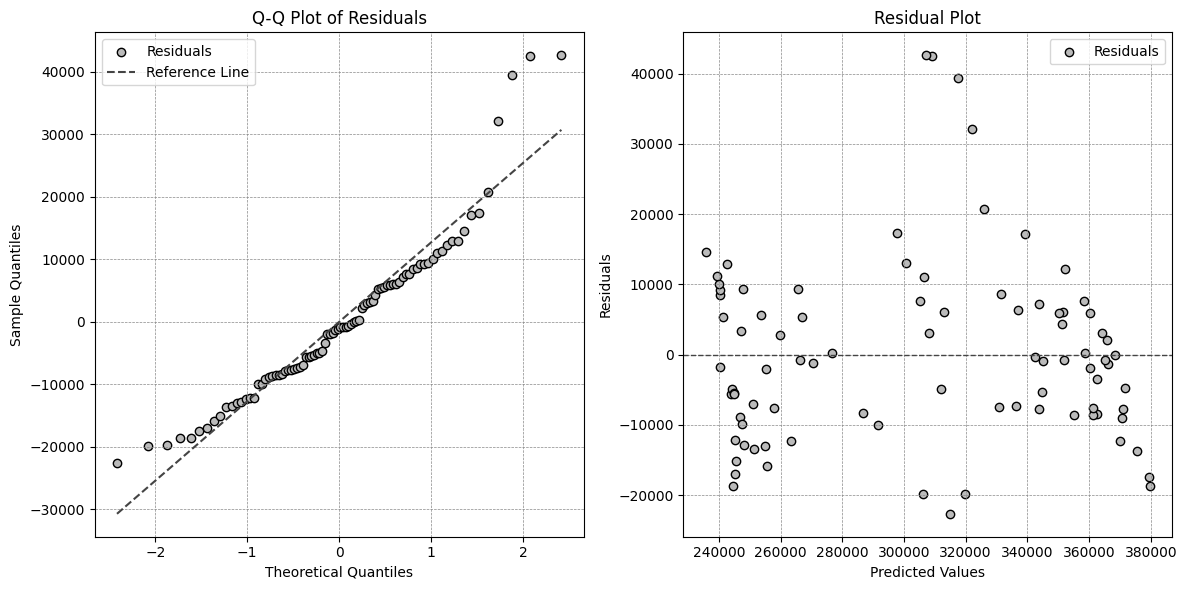

In [20]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract values
residuals = model.resid
predicted = model.fittedvalues
prob_x, prob_y = stats.probplot(residuals, dist="norm")[0]
slope, intercept, _ = stats.probplot(residuals, dist="norm")[1]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Q-Q Plot ---
ax1 = axes[0]
ax1.scatter(prob_x, prob_y, facecolor=bar_fill_color, edgecolor=bar_edge_color, label="Residuals")
ax1.plot(prob_x, slope * prob_x + intercept, color=mean_line_color, linestyle='--', label='Reference Line')
ax1.set_title("Q-Q Plot of Residuals", color=main_color)
ax1.set_xlabel("Theoretical Quantiles", color=main_color)
ax1.set_ylabel("Sample Quantiles", color=main_color)
ax1.tick_params(colors=main_color)
ax1.grid(True, linestyle='--', linewidth=0.5, color=median_line_color)
ax1.legend()

# --- Residual Plot ---
ax2 = axes[1]
ax2.scatter(predicted, residuals, facecolor=bar_fill_color, edgecolor=bar_edge_color, label="Residuals")
ax2.axhline(0, color=mean_line_color, linestyle='--', linewidth=1)
ax2.set_title("Residual Plot", color=main_color)
ax2.set_xlabel("Predicted Values", color=main_color)
ax2.set_ylabel("Residuals", color=main_color)
ax2.tick_params(colors=main_color)
ax2.grid(True, linestyle='--', linewidth=0.5, color=median_line_color)
ax2.legend()

# Final layout
plt.tight_layout()
filename = "./figure/picked/QQ-Residual_combined.png"
plt.savefig(filename, dpi=600)
plt.show()


Saving plot: unemployment_rate vs y_zhvi_t_plus_1


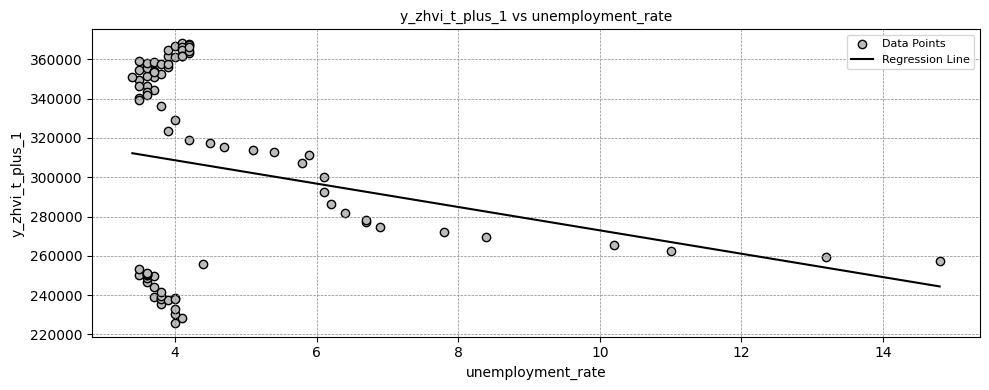

Saving plot: mortgage_30y_rate vs y_zhvi_t_plus_1


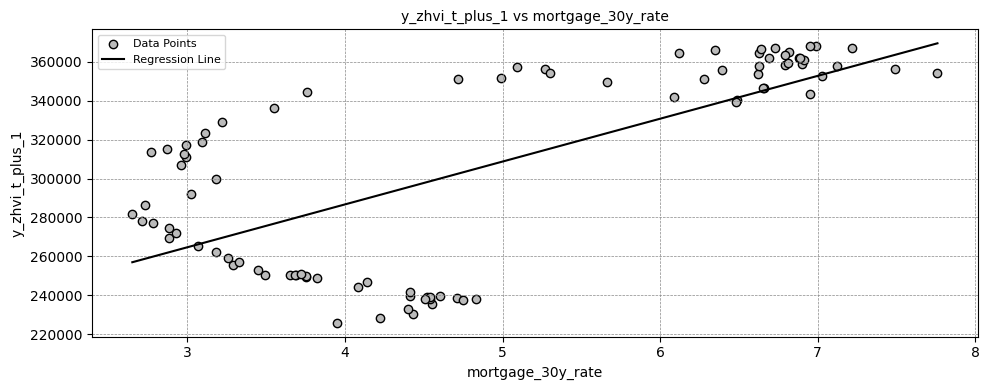

Saving plot: median_market_heat_index vs y_zhvi_t_plus_1


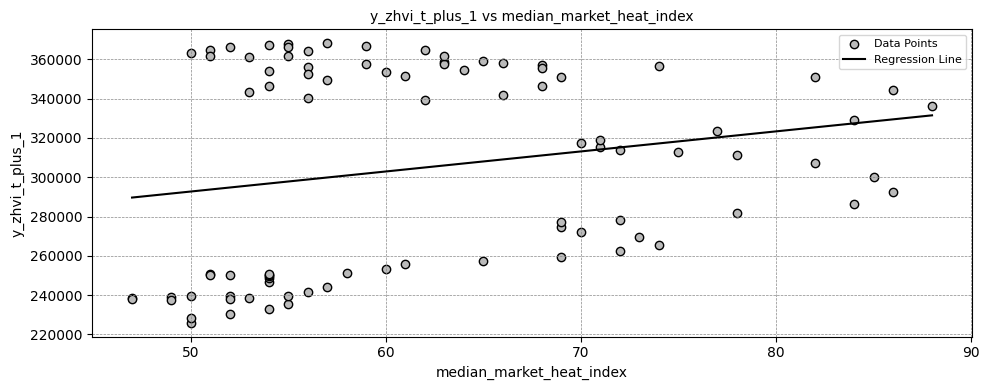

Saving plot: for_sale_inventory vs y_zhvi_t_plus_1


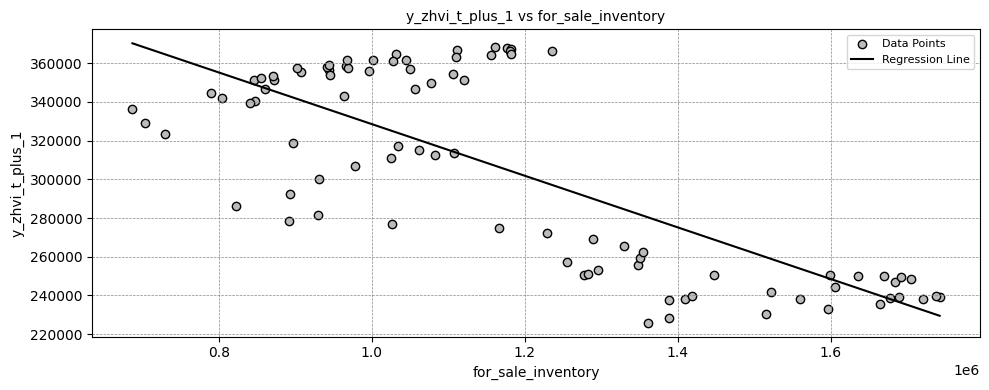

Saving plot: sp500_close vs y_zhvi_t_plus_1


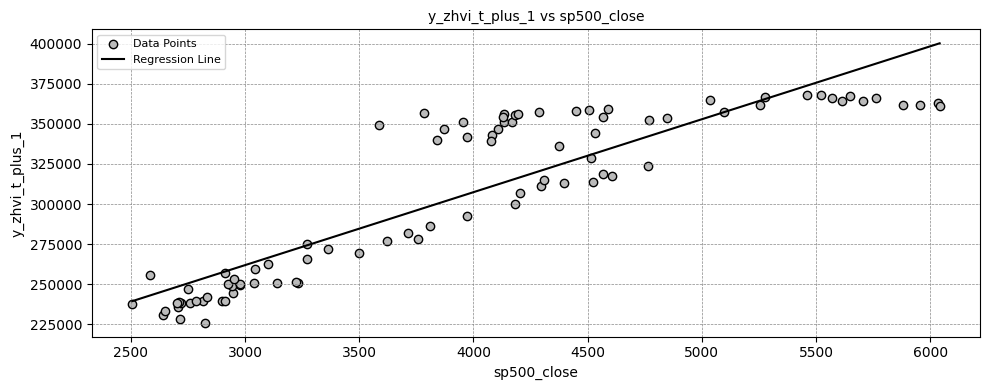

Saving plot: cpi vs y_zhvi_t_plus_1


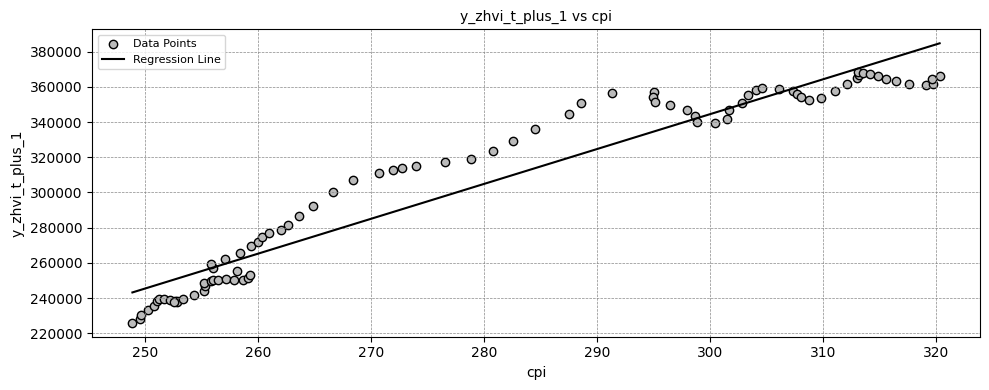

Saving plot: median_listing_price vs y_zhvi_t_plus_1


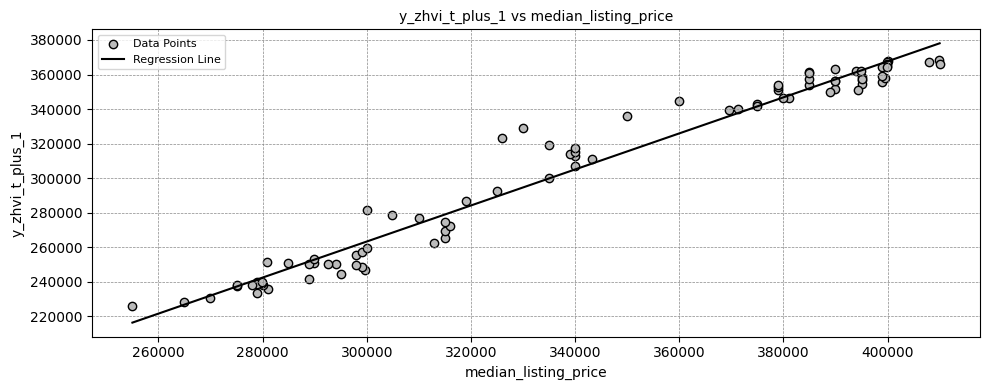

Saving plot: sale_to_list_ratio vs y_zhvi_t_plus_1


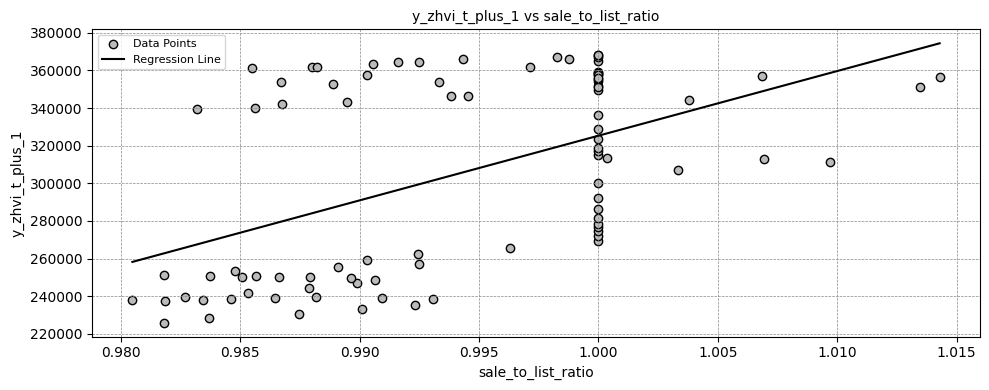

Saving plot: days_to_close vs y_zhvi_t_plus_1


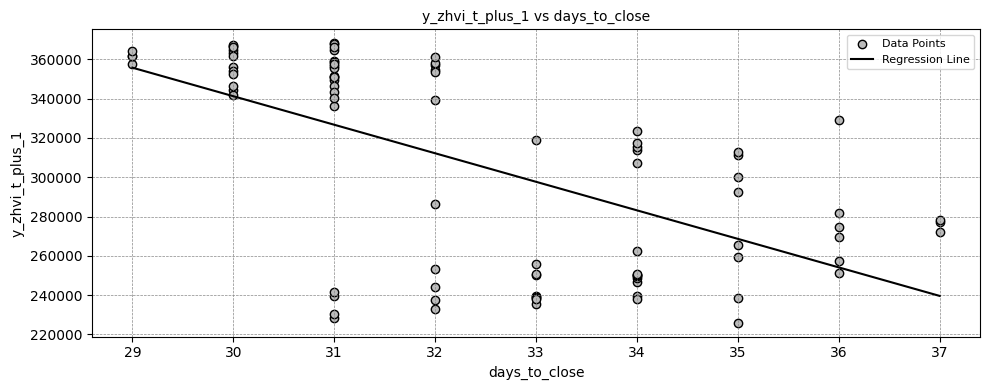

In [21]:
def plot_regression(df, x_var, y_var, save_dir=None):
    plt.figure(figsize=(10,4))  # Smaller figure size

    # Scatter plot
    plt.scatter(df[x_var], df[y_var], 
                color=bar_fill_color, edgecolor=bar_edge_color, label='Data Points')
    
    # Regression line
    coeffs = np.polyfit(df[x_var], df[y_var], deg=1)
    x_vals = np.linspace(df[x_var].min(), df[x_var].max(), 100)
    y_vals = coeffs[0] * x_vals + coeffs[1]
    plt.plot(x_vals, y_vals, color=main_color, linewidth=1.5, label='Regression Line')
    
    # Labels and styling
    plt.xlabel(x_var, color=main_color)
    plt.ylabel(y_var, color=main_color)
    plt.title(f'{y_var} vs {x_var}', fontsize=10, color=main_color)
    plt.tick_params(colors=main_color)
    plt.grid(True, linestyle='--', linewidth=0.5, color=median_line_color)
    plt.legend(fontsize=8)
    plt.tight_layout()

    # Save or show

    filename = f"{save_dir}/{y_var}_vs_{x_var}.png"
    plt.savefig(filename, dpi=300)
    plt.show()    
    plt.close()
    
# Create save directory
save_dir = "./figure/regression_plots/"
os.makedirs(save_dir, exist_ok=True)

# Plot all feature columns
y_var = 'y_zhvi_t_plus_1'
for feature in feature_columns + delete_columns:
    print(f"Saving plot: {feature} vs {y_var}")
    plot_regression(df, feature, y_var, save_dir=save_dir)
